In [1]:
# enable seamless adoption of changes to external python scripts
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm

from feedback_opt.optimizers import OptimizerDualHProximal, OptimizerDualYProximal, OptimizerPrimal
from feedback_opt.simulation import Simulation
from feedback_opt.systems import SystemNonLinear
from feedback_opt.utils import plot_carthesian, plot_cost_and_violation

In [3]:
from scenarios.scenario_nonconvex_toy import NonConvexToy

# fetch parameters for scenario
params = NonConvexToy()

# instatiate objects
system = SystemNonLinear(params.sys)
optimizer = [
    OptimizerPrimal(params.opt_prim, system),
    OptimizerDualHProximal(params.opt_dualhprox_cent, system),
    OptimizerDualHProximal(params.opt_dualhprox_dist, system),
    OptimizerDualYProximal(params.opt_dualyprox_dist, system),
]
simulation = [Simulation(params.sim, system, opt) for opt in optimizer]

In [4]:
results = [(sim.optimizer.name, sim.run()) for sim in tqdm(simulation)]

100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


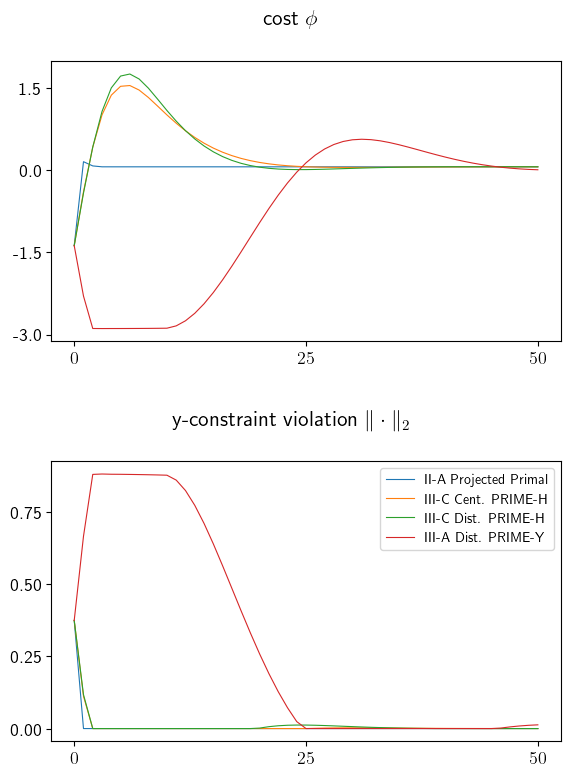

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.size": 13,
        "legend.fontsize": 10,
        "figure.figsize": (6, 8),
        "lines.linewidth": 0.8,
    }
)
plot_cost_and_violation(results, x_tick_spacing=25)

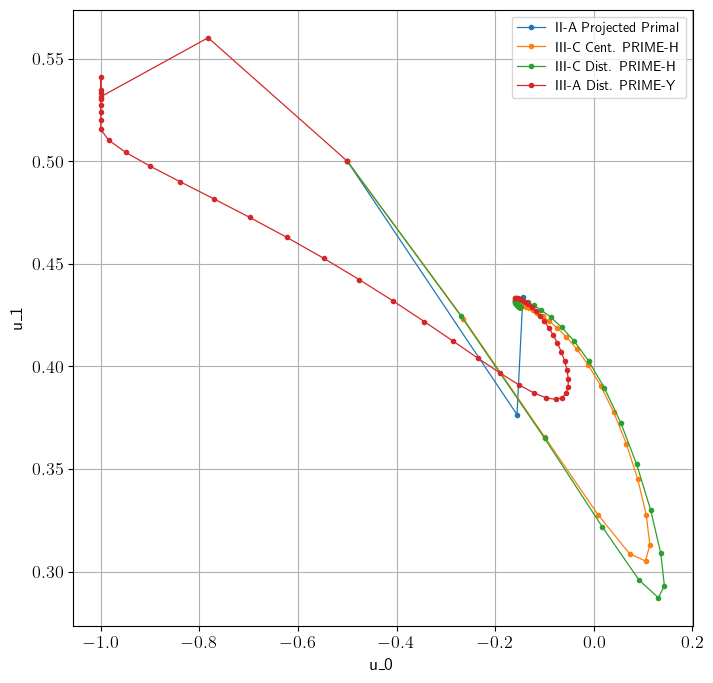

In [6]:
plot_carthesian(results, "u_0", "u_1")